# Introduction to Machine Learning Algorithms

-----

As a field, machine learning is both expansive and mathematically complex. From deriving simple linear relationships via regression analysis to finding clusters of data points in an $N$-dimensional space, statistical and machine learning techniques can take years to fully master. Given the short time available in this course, however, we will take the simpler path of demonstrating several commonly used approaches in order to introduce both the fundamental concepts in machine learning and the methodology we will use in Python to apply these concepts to actual data. For the latter, we will use the standard machine learning library in Python, which is the _scikit-learn_ module.

In this notebook, we introduce the general concept of machine learning by first discussing the entire process of learning from data. Next, we will use the scikit-learn, shortened to `sklearn` module, to demonstrate the three tasks of machine learning: classification, regression, and clustering. Note that this notebook is simply an introduction to these topics, we will explore these topics and other areas in more detail throughout this course.

-----


## Table of Contents

[Data Exploration](#Data-Exploration)

[Modeling with Scikit-Learn](#Modeling-with-Scikit-Learn)
- [Classification](#Classification)
- [Regression](#Regression)
- [Clustering](#Clustering)

-----

Before proceeding with the _data exploration_ section of this Notebook, we first have our standard notebook setup code.

-----

In [1]:
# Set up Notebook

%matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()

[Back to TOC](#Table-of-Contents)

## Data Exploration

-----

The first steps in any data analytics effort, once the business goal has been defined, are to understand and prepare the data of interest. For example, the [**Cross Industry Standard Process for Data Mining**][wcdm] or (**CRISP-DM**) starts with the _Business Understanding_, immediately followed by the _Data Understanding_ and _Data Preparation_. For machine learning analyses, these latter two steps require loading the data into our notebook, exploring the data either systematically or in a cumulative sense to understand the typical features for different instances. We also can generate descriptive statistical summaries and visualizations, such as a _pair plot_, to understand the data in full. Finally, we will need to clean the data to properly account for missing data, data that are incomplete or formatted incorrectly, or to generate meta-features (such as a date-time) from existing features.

For this notebook, we will focus on a single, simple data set, the standard [_Iris_ dataset][id], which is included by default with the Seaborn library. Note that given a data set, such as the _Iris_ data, we have rows, which correspond to different instances (e.g., different flowers), and columns, which correspond to different features of the instances (e.g., different measurements of the flowers). To understand the data, we first load this data into our notebook, before looking at several instances from the data. Next, we will group the data by species to explore cumulative quantities, before extracting a statistical summary of the entire data set. Finally, we will generate a pair plot to visually explore these data. Since this data has already been cleaned we will not need to perform additional tasks.

-----
[id]: https://en.wikipedia.org/wiki/Iris_flower_data_set
[wcdm]: https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining



In [2]:
# Load the Iris Data
iris = pd.read_csv("iris.csv")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


-----

The data set consists of 150 total measurements of three different types of Iris flowers, equally divided between three classes: Iris Setosa, Iris Versicolor, and Iris Virginica. Before proceeding, we can examine the Pandas DataFrame that contains these data to view typical  instances, to see a cumulative summary, and a brief statistical summary.

-----

In [3]:
# Examine several random rows
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
8,4.4,2.9,1.4,0.2,setosa
73,6.1,2.8,4.7,1.2,versicolor
37,4.9,3.6,1.4,0.1,setosa
24,4.8,3.4,1.9,0.2,setosa
44,5.1,3.8,1.9,0.4,setosa


In [4]:
# Examine grouped data
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [5]:
# Get descriptive statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


-----


As demonstrated by the output from the previous Code cells, our test data matches our expectations (note that the full Iris data set is listed on [Wikipedia][wi]). These data consist of three types, each with fifty instances, and every row has four measured features. The four primary features of the data are _Sepal Length_, _Sepal Width_, _Petal Length_, and _Petal Width_. In simple terms, petals are the showy, colorful part of the Iris flower, while the sepals provide protection and support for the petals.

In addition, our cursory exploration of the DataFrame indicated the data are clean. One simple way to verify this is that the _count_ is the same for every feature, and the descriptive statistics (e.g., _min_, _max_, and _mean_) are all numerical. If we had missing or bad data in our DataFrame, these measures would generally indicate the problem. If there were missing data, we could drop any instance with missing data by using the `dropna` method, or alternatively insert a value by using the `fillna` method.

At this point, we have loaded our data, and verified the data are clean. The next step is to visualize the relationships between the different features in our data.

-----

[wi]: https://en.wikipedia.org/wiki/Iris_flower_data_set

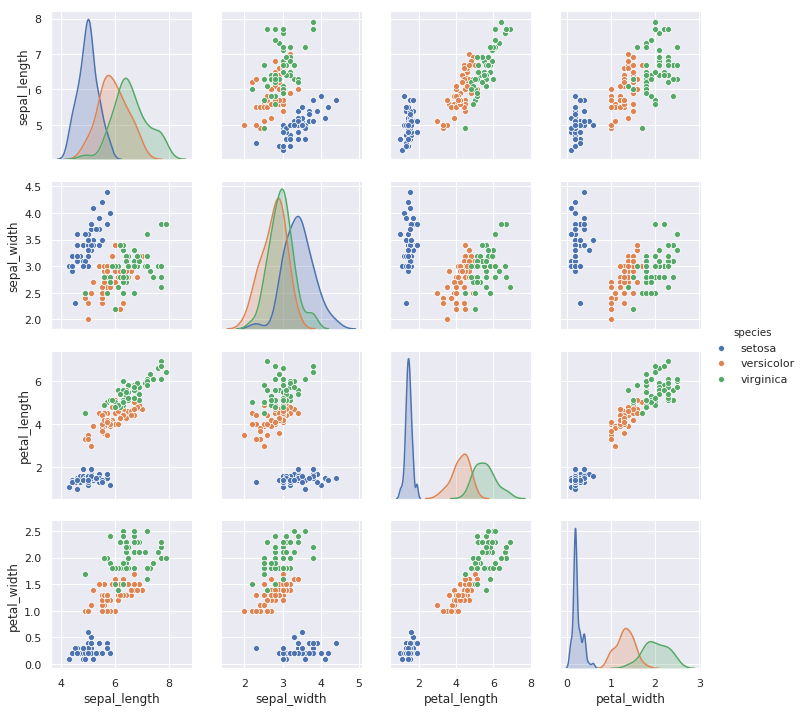

In [18]:
# Make pair plot
g = sns.pairplot(iris, hue="species")

-----

These figures indicate that the three Iris species cluster naturally in these dimensions, with minimal overlap. As a result, these data provide an excellent test for different machine learning algorithms. Our next step is to build explicit _data_ and _label_.

We select all four features, `'sepal_length', 'sepal_width', 'petal_length', 'petal_width'` as data. Next, we create a numerical array from species column, where 0, 1, and 2 are mapped distinctly into Setosa, Versicolor, and Virginica. This encoded label simplifies the classification process, since the machine learning algorithms natively operate on numbers and not string labels.

-----

In [7]:
# Extract the features for all instances and define instance labels
from sklearn.preprocessing import LabelEncoder

data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
labels = LabelEncoder().fit_transform(iris.species)
label_names = ['Setosa', 'Versicolor', 'Virginica']

-----

With these new data structures, we can begin to apply machine learning algorithms from the scikit-learn module. First, however, we will generate one scatter plot that displays a larger version of the _Sepal Width_ versus _Petal Width_ scatter plot to highlight the inherent structure in these data. Furthermore, we will refer back to this plot in later analyses in this Notebook.

-----

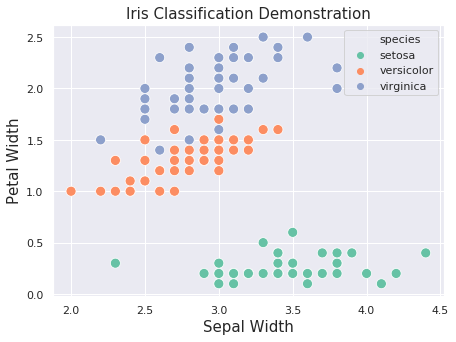

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.scatterplot(x="sepal_width", y="petal_width", palette="Set2", hue="species", data=iris, ax=ax, s=100)
ax.set_title("Iris Classification Demonstration", fontsize=15)
ax.set_xlabel('Sepal Width', fontsize=15)
ax.set_ylabel('Petal Width', fontsize=15)
plt.show()

-----

As the above plot clearly shows, the _Setosa_ type is already separated in these two dimensions, and the other two types, Versicolor and Virginica, are nearly separated. This will simplify the task of running and evaluating the machine learning algorithms in the rest of this Notebook. However, this will not always be the case with arbitrary, real-world data. 

-----

[Back to TOC](#Table-of-Contents)

## Machine Learning Algorithms

-----

Machine learning algorithms can be classified by the method in which they are constructed. [Supervised learning][sl] methods use training data to build a model, which is subsequently applied to additional data. On the other hand, [unsupervised learning][ul] methods seek relationships among data points that can be leveraged to construct a model that is subsequently applied to the data of interest. 

-----

In this notebook, we will demonstrate three machine learning algorithms:

1. [Classification][cla], supervised learning, generates a model that predicts discrete categories for new, unseen data.

2. [Regression][re], supervised learning, generates a model that predicts continuous values for new, unseen data.

3. [Clustering][clu], unsupervised learning, identifies clusters of instances in an $N$-dimensional feature space.


-----

One final point to clarify before proceeding with demonstrations of these different algorithm categories. When applying a machine learning algorithm to a problem, we often need to specify both model parameters and model hyperparameters. While they are similar, the difference between these two types of information depends on whether the value can be estimated from the data.
  
**Parameter**  
Parameter is a value that can be estimated from the data being analyzed, and that is internal to the machine learning algorithm. A parameter is generally not specified by the programmer, and instead is determined automatically by the algorithm implementation (e.g., directly in the scikit-learn library). For example, the coefficients in a linear regression model are machine learning parameters.
  
**Hyperparameter**  
Hyperparameter is a value that cannot be estimated from the data being analyzed and that is external to a specific machine learning algorithm. A hyperparameter is generally specified by the programmer prior to the start of the learning process. As a result, the hyperparameter directly influences the performance of the algorithm and thus is a tunable parameter. For example, the number of neighbors in a k-nearest neighbors implementation is a hyperparameter.

We will discuss machine learning model hyperparameters in more detail in future lessons.

-----

[cla]: https://en.wikipedia.org/wiki/Statistical_classification
[re]: https://en.wikipedia.org/wiki/Regression_analysis
[dr]: https://en.wikipedia.org/wiki/Dimensionality_reduction
[clu]: https://en.wikipedia.org/wiki/Cluster_analysis
[sl]: https://en.wikipedia.org/wiki/Supervised_learning
[ul]: https://en.wikipedia.org/wiki/Unsupervised_learning
[ssl]: https://en.wikipedia.org/wiki/Semi-supervised_learning
[wtl]: https://en.wikipedia.org/wiki/Transfer_learning
[wrl]: https://en.wikipedia.org/wiki/Reinforcement_learning#Current_research
[wdl]: https://en.wikipedia.org/wiki/Deep_learning
[whp]: https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)


[Back to TOC](#Table-of-Contents)

## Modeling with Scikit-Learn

-----

The scikit-learn module is a powerful, yet simple to use machine learning library written in the Python programming language. The general approach to using this library in a data analytics script is to follow a basic script:

1. Pre-process data.
2. Given the application type: classification, regression, or clustering, create the appropriate scikit-learn estimator.
3. Determine the best _hyper-parameters_ for the machine learning application (e.g., number of neighbors for the k-nearest neighbors algorithm).
4. Apply the `fit` method for the selected estimator to generate a best fit model.
5. For supervised learning, evaluate the machine learning algorithm on test data by calling an appropriate `score` method (and other available performance metrics).
6. Apply the generated  model to new data by calling the `predict` method for classification and regression applications, and, either `predict` or `transform` for clustering applications.

The rest of this notebook demonstrates this basic script for each of the three application types: classification, regression, and clustering. First, however, we will demonstrate several important data pre-processing that generally occurs before the application of a scikit-learn machine learning algorithm. 

The first pre-processing step is the separation of the data into training and testing samples, and the second pre-processing step is the scaling of the features. Since the iris features are fairly normally distributed(indicated by the pair plot above), we will standardize the features.

**Please note**, you are not required to understand all the python code in the rest of this notebook. Just pay attention to the general process of modeling with scikit-learn. We will discuss these machine learning algorithms in more detail in the following modules.

-----

In [9]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
# Note that we have both 'data' and 'labels'
d_train, d_test, l_train, l_test \
    = train_test_split(data, labels, test_size=0.4, random_state=23)

In [10]:
from sklearn.preprocessing import StandardScaler

# Create and fit scaler
ss = StandardScaler().fit(d_train)

d_train_ss = ss.transform(d_train)
d_test_ss = ss.transform(d_test)

-----

With our data properly divided into training and testing samples, and the features appropriately scaled, we now change to the application of machine learning algorithms by using the appropriate estimator from the scikit-learn library. We only introduce three algorithms briefly in this notebook and we'll discuss the algorithms in more detail in the following modules.

-----

### Classification

The first type of algorithm we will demonstrate is classification, where we train an estimator to generate a model for the prediction of discrete labels. The following Code cell completes this task by performing [k-Nearest Neighbors][knn] classification by using scikit-learn. In this example, we use five nearest neighbors (but this value can be easily adjusted to see how the classification performance changes). As demonstrated in this code example, the standard classification process in scikit-learn is to first fit a model to the training data and to subsequently apply this model to predict values for the testing data. We can compute an accuracy measurement for our trained algorithm by using the `score` method to compare the _predicted_ and _known_ labels for the testing data.

-----

[knn]: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# First we construct our model
knn = KNeighborsClassifier(n_neighbors=5)

# Now train our model
knn.fit(d_train_ss, l_train)

# Get prediction on test data
prediction = knn.predict(d_test_ss)


In [12]:
# First, lets try k-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# The number of neighbors affects performance
nbrs = 5

# First we construct our model
knn = KNeighborsClassifier(n_neighbors=nbrs)

# Now train our model
knn.fit(d_train_ss, l_train)

# Get prediction on test data
prediction = knn.predict(d_test_ss)

# Compute and display accuracy score
score = 100.0 * knn.score(d_test_ss, l_test)
print(f"KNN ({nbrs} neighbors) prediction accuracy = {score:5.1f}%")

KNN (5 neighbors) prediction accuracy =  96.7%


-----

### Regression

The second machine learning application we will demonstrate is regression. To demonstrate regression, we will use the [Decision Tree][dt] regressor. A decision tree simply asks a set of questions of the data, and based on the answers, constructs a model representation. The tree (or model) is constructed by recursively splitting a data set into new groupings based on a statistical measure of the data along each different dimension (popular measures include the Gini coefficient or the entropy).

The terminal nodes in the tree are known as leaf nodes, and they provide the final predictions. In the simplest form, the leaf node simply provides the final prediction. More realistic decision trees generate a model prediction by using all instances in the leaf node, for example by averaging across them.

Before generating a regression model, however, we must pre-process our data to identify our independent variables (or features) and our dependent variable (or feature). Given a set of new independent variables, a regression model will predict the dependent variable. In the following Code cell, we first select the first three features to be our independent variables and the fourth variable to be our dependent variable. We divide these into training and testing samples.


-----

[dt]: https://en.wikipedia.org/wiki/Decision_tree_learning

In [13]:
# Chunk out first three columns as our independent variables
# Last column becomes our dependent variable
ind_data = data[['sepal_length', 'sepal_width', 'petal_length']]
dep_data = data['petal_width']

# This is the amount to hold out for 'blind' testing
frac = 0.4

d_train, d_test, r_train, r_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=23)

-----

We can now create a decision tree regressor by using scikit-learn to create an estimator, fit the estimator to the training data, and finally, apply the model to the test data to make predictions. At the end of the following Code cell, we also compute a performance score for the resulting model by comparing the predictions to the actual values for the testing data.

-----

In [14]:
# Next lets try Decision Trees
from sklearn.tree import DecisionTreeRegressor

# Construct the tree regressor
dtr = DecisionTreeRegressor()

# Fit the regressor to the training data
dtr.fit(d_train, r_train)

# Compute and display score from test data
score = 100.0 * dtr.score(d_test, r_test)
print(f'DT regression accuracy = {score:5.1f}%')

DT regression accuracy =  90.2%


-----

### Clustering

The last machine learning technique we will explore in this notebook is [cluster finding][cl]. In this introductory notebook, we will demonstrate one of the simplest clustering techniques, spatial clustering, which seeks to first find $N$ clusters in a data set and to subsequently identify to which cluster each instance (or data point) belongs. The specific algorithm we employ below is the [k-means algorithm][km], which is one of the simplest to understand. In this algorithm, we start with a guess for the number of clusters (again this can be based on prior information or iteratively quantified). We randomly place cluster centers in the data and determine how well the data _cluster_ to these cluster centers. This information is used to pick new cluster centers, and the process continues until a solution converges (or we reach a predefined number of iterations). 

We can employ k-means clustering with scikit-learn by using the `KMeans` estimator within the `cluster` module. This requires the number of clusters as a hyper-parameter. We also pass in the original, unscaled data since we will want the cluster centers in the original space spanned by our instances. After the model is created, we once again fit the model to the data and subsequently obtain our model predictions. We also specify a value for the `random_state` hyper-parameter to ensure reproducibility. Note how this process is unsupervised, in that we do not use the label array in this process. 

After we find our clusters, we plot the original data and the new cluster centers to visually quantify how well the algorithm performed.

-----
[cl]: https://en.wikipedia.org/wiki/Cluster_analysis
[km]: https://en.wikipedia.org/wiki/K-means_clustering

In [15]:
# We will use kmeans from scikit-learn
from sklearn.cluster import KMeans

# We build our model assuming three clusters
k_means = KMeans(n_clusters=3, random_state=23)

# We fit our data to assign classes
k_means.fit(data)

print(k_means.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


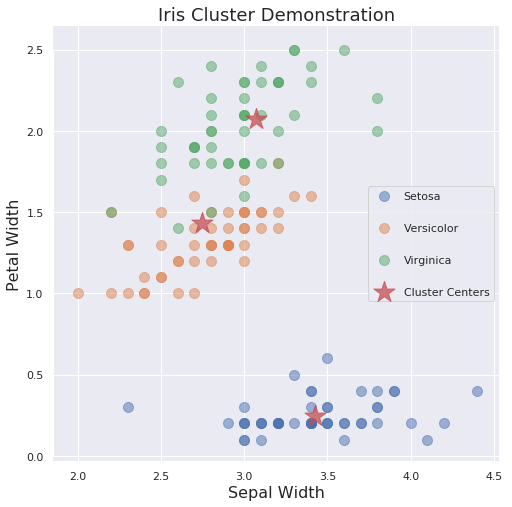

In [16]:
from matplotlib import cm
#pick Sepal Width and Petal Width
x = data['sepal_width']
y = data['petal_width']
# Define cluster centers (SW vs PW)
xcc = k_means.cluster_centers_[:,1]
ycc = k_means.cluster_centers_[:,3]

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(8, 8))

for idx in np.unique(labels):
    # Convert index into an int
    i = int(idx)
    ax.scatter(x[labels == i], y[labels == i], label=f'{label_names[i]}',
               s=100, alpha = .5, cmap=cm.coolwarm) 

# Plot cluster centers
ax.scatter(xcc, ycc, marker='*', label='Cluster Centers', 
           s=500, alpha=0.75, cmap=cm.coolwarm)

# Decorate and clean plot
ax.set_xlabel('Sepal Width', fontsize=16)
ax.set_ylabel('Petal Width', fontsize=16)
ax.legend(loc = 7, labelspacing=2)
ax.set_title("Iris Cluster Demonstration", fontsize=18)
sns.despine(offset=0, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used the scikit-learn library to perform introductory machine learning. Make the following Code changes in those Code cells and execute the notebook again to answer the associated question.

1. Change the first `test-size` split from 0.4 to 0.25. How did the classification results change?
2. Change the `random_state` parameter in any of the Code cells. Do the results change? Why or why not?

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. The [scikit-learn tutorial][1] on the sciki-learn website.
4. An [overview of machine learning][4] excerpt from the _Python Data Science Handbook_ by Jake VanderPlas.
5. An [introduction to scikit-learn][5] excerpt from the _Python Data Science Handbook_ by Jake VanderPlas.

-----

[1]: http://scikit-learn.org/stable/tutorial/basic/tutorial.html
[4]: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.01-What-Is-Machine-Learning.ipynb
[5]: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb